In [2]:
#importing required packages

import uproot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from skhep.math.vectors import LorentzVector, Vector3D

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

In [3]:
%%time
inTree = uproot.concatenate("DlDl_*ed-1-199.root:Y4S",library="pd")
Tree=inTree.copy()

/Users/sahargholipour/opt/anaconda3/lib/python3.9/site-packages/uproot/interpretation/library.py:805: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]


CPU times: user 37.2 s, sys: 3.97 s, total: 41.2 s
Wall time: 44.2 s


In [4]:
try:
    bTree # do nothing if this has already been calculated
except NameError:
    phiB0=np.array(pd.Series.to_list(Tree['B0_phiCM'])) #Tree['B0_phiCM'].to_numpy()
    cthB0=np.array(pd.Series.to_list(Tree['B0_cosThCM']))
    mB0=np.array(pd.Series.to_list(Tree['B0_InvM']))
    pB0=np.array(pd.Series.to_list(Tree['B0_pCM']))
    EB0=np.array(pd.Series.to_list(Tree['B0_ECM']))
    phiB1=np.array(pd.Series.to_list(Tree['B1_phiCM']))
    cthB1=np.array(pd.Series.to_list(Tree['B1_cosThCM']))
    mB1=np.array(pd.Series.to_list(Tree['B1_InvM']))
    pB1=np.array(pd.Series.to_list(Tree['B1_pCM']))
    EB1=np.array(pd.Series.to_list(Tree['B1_ECM']))
    cdelcalc=pow(1-cthB0*cthB0,0.5)*pow(1-cthB1*cthB1,0.5)*(np.cos(phiB0)*np.cos(phiB1)+np.sin(phiB0)*np.sin(phiB1)) \
        +cthB0*cthB1 
    mDB0=np.array(pd.Series.to_list(Tree['D_B0_InvM']))
    EDB0=np.array(pd.Series.to_list(Tree['D_B0_ECM']))
    pDB0=np.array(pd.Series.to_list(Tree['D_B0_pCM']))
    phiDB0=np.array(pd.Series.to_list(Tree['D_B0_phiCM']))
    cthDB0=np.array(pd.Series.to_list(Tree['D_B0_cosThCM']))
    mpi4B0=np.array(pd.Series.to_list(Tree['pi4_B0_InvM']))
    Epi4B0=np.array(pd.Series.to_list(Tree['pi4_B0_ECM']))
    ppi4B0=np.array(pd.Series.to_list(Tree['pi4_B0_pCM']))
    phipi4B0=np.array(pd.Series.to_list(Tree['pi4_B0_phiCM']))
    cthpi4B0=np.array(pd.Series.to_list(Tree['pi4_B0_cosThCM']))
    mDpi4B0=pow( mDB0*mDB0+mpi4B0*mpi4B0 + 2*( pow(mDB0*mDB0+pDB0*pDB0,0.5)*pow(mpi4B0*mpi4B0+ppi4B0*ppi4B0,0.5) - \
         pDB0*ppi4B0*( pow(1-cthDB0*cthDB0,0.5)*pow(1-cthpi4B0*cthpi4B0,0.5)*(np.cos(phiDB0)*np.cos(phipi4B0)+ \
                    np.sin(phiDB0)*np.sin(phipi4B0)) +cthDB0*cthpi4B0 ) ) ,0.5)

    mDB1=np.array(pd.Series.to_list(Tree['D_B1_InvM']))
    EDB1=np.array(pd.Series.to_list(Tree['D_B1_ECM']))
    pDB1=np.array(pd.Series.to_list(Tree['D_B1_pCM']))
    phiDB1=np.array(pd.Series.to_list(Tree['D_B1_phiCM']))
    cthDB1=np.array(pd.Series.to_list(Tree['D_B1_cosThCM']))
    mpi4B1=np.array(pd.Series.to_list(Tree['pi4_B1_InvM']))
    Epi4B1=np.array(pd.Series.to_list(Tree['pi4_B1_ECM']))
    ppi4B1=np.array(pd.Series.to_list(Tree['pi4_B1_pCM']))
    phipi4B1=np.array(pd.Series.to_list(Tree['pi4_B1_phiCM']))
    cthpi4B1=np.array(pd.Series.to_list(Tree['pi4_B1_cosThCM']))
    mDpi4B1=pow( mDB1*mDB1+mpi4B1*mpi4B1 + 2*( pow(mDB1*mDB1+pDB1*pDB1,0.5)*pow(mpi4B1*mpi4B1+ppi4B1*ppi4B1,0.5) - \
         pDB1*ppi4B1*( pow(1-cthDB1*cthDB1,0.5)*pow(1-cthpi4B1*cthpi4B1,0.5)*(np.cos(phiDB1)*np.cos(phipi4B1)+ \
                    np.sin(phiDB1)*np.sin(phipi4B1)) +cthDB1*cthpi4B1 ) ) ,0.5)
    
    EBeam = 5.2898 #E(Y4S)/2
    mBPDG = 5.2795
    pBcons = pow(EBeam*EBeam-mBPDG*mBPDG,0.5)
# calculate cosBY when swapping assignment of pi4 from B0 --> B1
    EB0swap0 = EB0 - Epi4B0
    pB0swap0x = pB0*pow(1-cthB0*cthB0,0.5)*np.cos(phiB0) - ppi4B0*pow(1-cthpi4B0*cthpi4B0,0.5)*np.cos(phipi4B0)
    pB0swap0y = pB0*pow(1-cthB0*cthB0,0.5)*np.sin(phiB0) - ppi4B0*pow(1-cthpi4B0*cthpi4B0,0.5)*np.sin(phipi4B0)
    pB0swap0z = pB0*cthB0 - ppi4B0*cthpi4B0
    pB0swap0 = pow(pB0swap0x*pB0swap0x+pB0swap0y*pB0swap0y+pB0swap0z*pB0swap0z, 0.5)
    mB0swap0 = pow(EB0swap0*EB0swap0 - pB0swap0*pB0swap0, 0.5)
    cosBY0swap0 = (2*EBeam*EB0swap0 - mBPDG*mBPDG - mB0swap0*mB0swap0) / ( 2*pBcons*pB0swap0 )
    EB1swap0 = EB1 + Epi4B0
    pB1swap0x = pB1*pow(1-cthB1*cthB1,0.5)*np.cos(phiB1) + ppi4B0*pow(1-cthpi4B0*cthpi4B0,0.5)*np.cos(phipi4B0)
    pB1swap0y = pB1*pow(1-cthB1*cthB1,0.5)*np.sin(phiB1) + ppi4B0*pow(1-cthpi4B0*cthpi4B0,0.5)*np.sin(phipi4B0)
    pB1swap0z = pB1*cthB1 + ppi4B0*cthpi4B0
    pB1swap0 = pow(pB1swap0x**2+pB1swap0y**2+pB1swap0z**2, 0.5)
    mB1swap0 = pow(EB1swap0**2 - pB1swap0**2, 0.5)    
    cosBY1swap0 = (2*EBeam*EB1swap0 - mBPDG**2 - mB1swap0**2) / ( 2*pBcons*pB1swap0 )
# calculate cosBY when swapping assignment of pi4 from B1 --> B0
    EB0swap1 = EB0 + Epi4B1
    pB0swap1x = pB0*pow(1-cthB0*cthB0,0.5)*np.cos(phiB0) + ppi4B1*pow(1-cthpi4B1*cthpi4B1,0.5)*np.cos(phipi4B1)
    pB0swap1y = pB0*pow(1-cthB0*cthB0,0.5)*np.sin(phiB0) + ppi4B1*pow(1-cthpi4B1*cthpi4B1,0.5)*np.sin(phipi4B1)
    pB0swap1z = pB0*cthB0 + ppi4B1*cthpi4B1
    pB0swap1 = pow(pB0swap1x**2+pB0swap1y**2+pB0swap1z**2, 0.5)
    mB0swap1 = pow(EB0swap1*EB0swap1 - pB0swap1*pB0swap1, 0.5)
    cosBY0swap1 = (2*EBeam*EB0swap1 - mBPDG**2 - mB0swap1**2) / ( 2*pBcons*pB0swap1 )
    EB1swap1 = EB1 - Epi4B1
    pB1swap1x = pB1*pow(1-cthB1*cthB1,0.5)*np.cos(phiB1) - ppi4B1*pow(1-cthpi4B1*cthpi4B1,0.5)*np.cos(phipi4B1)
    pB1swap1y = pB1*pow(1-cthB1*cthB1,0.5)*np.sin(phiB1) - ppi4B1*pow(1-cthpi4B1*cthpi4B1,0.5)*np.sin(phipi4B1)
    pB1swap1z = pB1*cthB1 - ppi4B1*cthpi4B1
    pB1swap1 = pow(pB1swap1x**2+pB1swap1y**2+pB1swap1z**2, 0.5)
    mB1swap1 = pow(EB1swap1*EB1swap1 - pB1swap1*pB1swap1, 0.5)
    cosBY1swap1 = (2*EBeam*EB1swap1 - mBPDG**2 - mB1swap1**2) / ( 2*pBcons*pB1swap1 )
        
# examine truth information for pi0 or pi+ from B SL decays
    npMCGenPDG=[]
    npMCGenMothIndex=[]
    for i in range(0,25):
        npMCGenPDG.append(np.array(pd.Series.to_list(Tree[f'MCGenPDG_{i}'])))
        npMCGenMothIndex.append(np.array(pd.Series.to_list(Tree[f'MCGenMothIndex_{i}'])))
        
# look for pi0 that has B as direct parent or as grandparent via D* parent
    foundBDpi0 = False
    Dpi0Mom = np.zeros(len(npMCGenPDG[0]))
    Dpi0Grandma = np.zeros(len(npMCGenPDG[0]))
    for ind in range(len(npMCGenPDG[0])):
        for j in range(3,25):
            if not npMCGenPDG[j][ind]==111: continue
            mom = int(npMCGenMothIndex[j][ind])
            if abs(npMCGenPDG[mom][ind]) in [511,521]: #if mom in [1, 2]
                foundBDpi0 = True
                Dpi0Mom[ind] = npMCGenPDG[mom][ind]
                Dpi0Grandma[ind] = 300553
                break;
            if abs(npMCGenPDG[mom][ind]) in [415, 10411, 10413, 20413, 425, 10421, 10423, 20423]:
                gmom = int(npMCGenMothIndex[mom][ind])
                if abs(npMCGenPDG[gmom][ind]) in [511,521]:
                    foundBDpi0 = True
                    Dpi0Mom[ind] = npMCGenPDG[mom][ind]
                    Dpi0Grandma[ind] = npMCGenPDG[gmom][ind]
                break;

# look for pi+ that has B as direct parent or as grandparent via D* parent
    foundBDpi = False
    DpipMom = np.zeros(len(npMCGenPDG[0]))
    DpipGrandma = np.zeros(len(npMCGenPDG[0]))
    for ind in range(len(npMCGenPDG[0])):
        for j in range(3,25):
            if not npMCGenPDG[j][ind]==211: continue
            mom = int(npMCGenMothIndex[j][ind])
            if abs(npMCGenPDG[mom][ind]) in [511,521]:
                foundBDpip = True
                DpipMom[ind] = npMCGenPDG[mom][ind]
                DpipGrandma[ind] = 300553
                break;
            if abs(npMCGenPDG[mom][ind]) in [415, 10411, 10413, 20413, 425, 10421, 10423, 20423]:
                gmom = int(npMCGenMothIndex[mom][ind])
                if abs(npMCGenPDG[gmom][ind]) in [511,521]:
                    foundBDpip = True
                    DpipMom[ind] = npMCGenPDG[mom][ind]
                    DpipGrandma[ind] = npMCGenPDG[gmom][ind]
                break;
                
# reconsider best candidate choice
    
    cosBY0=np.array(pd.Series.to_list(Tree['cosBY0']))
    cosBY1=np.array(pd.Series.to_list(Tree['cosBY1']))
    event=np.array(pd.Series.to_list(Tree['__event__']))
    candidate=np.array(pd.Series.to_list(Tree['__candidate__']))
    Y4SScore=np.array(pd.Series.to_list(Tree['Y4SScore']))
    lastev = -1
    newBest = {}
    for i in range(len(event)):
        if event[i]==lastev:
            if bestY4SScore-Y4SScore[i] < 2 and ( abs(bestCosBY0)>1.1 or abs(bestCosBY1)>1.1 ) and \
                (bestCosBY0*bestCosBY0+bestCosBY1*bestCosBY1) > cosBY0[i]*cosBY0[i]+cosBY1[i]*cosBY1[i] :
                newBest[lastev] = candidate[i]
                bestCosBY0 = cosBY0[i]
                bestCosBY1 = cosBY1[i]
        else:
            newBest[event[i]] = 0
            bestY4SScore = Y4SScore[i]
            bestCosBY0 = cosBY0[i]
            bestCosBY1 = cosBY1[i]
            lastev = event[i]

    myBest = np.zeros(len(event))
    for i in range(len(event)):
        myBest[i] = newBest[event[i]]
    
    bTree=pd.DataFrame(data={'cosDelc':cdelcalc, 'mDpiB0':mDpi4B0, 'mDpiB1':mDpi4B1, \
                             'Dpi0Mom':Dpi0Mom, 'Dpi0GMom':Dpi0Grandma, 'DpipMom':DpipMom, 'DpipGMom':DpipGrandma,\
                       'cosBY0swap0':cosBY0swap0, 'cosBY1swap0':cosBY1swap0,\
                       'cosBY0swap1':cosBY0swap1, 'cosBY1swap1':cosBY1swap1, 'myBest':myBest})
    aTree=pd.concat([Tree,bTree],axis=1)
aTree

,__experiment__,__run__,__event__,__production__,__candidate__,__ncandidates__,__weight__,aBminusMode,aBplusMode,aB0Mode,...,mDpiB1,Dpi0Mom,Dpi0GMom,DpipMom,DpipGMom,cosBY0swap0,cosBY1swap0,cosBY0swap1,cosBY1swap1,myBest
0,1003,0,21123621,24821,0,9,1.0,-99.0,-99.0,1024.0,...,2.234307,-415.0,511.0,10411.0,-511.0,-0.526442,1.419609,0.827521,-0.149450,0.0
1,1003,0,21123621,24821,1,9,1.0,-99.0,-99.0,1024.0,...,NaN,-415.0,511.0,10411.0,-511.0,-0.145485,-0.002355,NaN,NaN,0.0
2,1003,0,21123621,24821,2,9,1.0,-99.0,-99.0,1024.0,...,2.309119,-415.0,511.0,10411.0,-511.0,NaN,NaN,1.265513,-0.526442,0.0
3,1003,0,21123621,24821,3,9,1.0,-99.0,-99.0,1024.0,...,2.234307,-415.0,511.0,10411.0,-511.0,NaN,NaN,0.457648,-0.149450,0.0
4,1003,0,21123621,24821,4,9,1.0,-99.0,-99.0,1024.0,...,2.098961,-415.0,511.0,10411.0,-511.0,-0.526442,1.356803,0.827521,-0.541254,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95246,1003,0,42299891,24816,4,9,1.0,-1001.0,1748.0,-99.0,...,3.491824,521.0,300553.0,521.0,300553.0,-1.544706,1.936746,1.654357,-0.679072,1.0
95247,1003,0,42299891,24816,5,9,1.0,-1001.0,1748.0,-99.0,...,3.334758,521.0,300553.0,521.0,300553.0,-1.544706,2.322037,1.639215,-0.677100,1.0
95248,1003,0,42299891,24816,6,9,1.0,-1001.0,1748.0,-99.0,...,3.238282,521.0,300553.0,521.0,300553.0,-1.065414,2.267293,1.360684,-1.972914,1.0
95249,1003,0,42299891,24816,7,9,1.0,-1001.0,1748.0,-99.0,...,3.385222,521.0,300553.0,521.0,300553.0,-1.544706,1.972277,1.866163,-1.972969,1.0


In [5]:
AND=" and ";   OR=" or ";   NOT=" not ";   cand0=" (__candidate__==0) ";   mycand=" (__candidate__==myBest) "
BpBmcut="( decayModeID==3005530 )";        B0B0cut="( decayModeID>=3005531 and decayModeID<=3005533 )"
roecuts="( nROE_Ch==0 and Eextra_ROE<1 )"
y4scuts="( cosBY0<1.1 and cosBY0>-1.9 and cosBY1<1.1 and cosBY1>-1.9 and (B0_decayModeID<500 or B1_decayModeID<500) )"
pipcut0="( (abs(pi4_B0_InvM-0.1395)<0.001 and pi4_1_B0_PDG!=22)"
pipcut1="( (abs(pi4_B1_InvM-0.1395)<0.001 and pi4_1_B1_PDG!=22)"
pipcut = '('+pipcut0 +OR+ pipcut1+')'
piptrue= '(('+pipcut0+AND+'(pi4_B0_isSignal==1))' +OR+ '('+pipcut1+AND+'(pi4_B1_isSignal==1))'+')'
pi0cut0="(abs(pi4_B0_InvM-0.135)<0.025 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
pi0cut1="(abs(pi4_B1_InvM-0.135)<0.025 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
pi0cut = '('+pi0cut0 +OR+ pi0cut1+')'
pi0wide0="(abs(pi4_B0_InvM-0.135)<0.050 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
pi0wide1="(abs(pi4_B1_InvM-0.135)<0.050 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
pi0wide = '('+pi0wide0 +OR+ pi0wide1+')'
pi0true0= '('+pi0wide0 +AND+ '(pi4_B0_isSignal==1)'+')'
pi0true1= '('+pi0wide1 +AND+ '(pi4_B1_isSignal==1)'+')'
pi0true = '('+pi0true0 +OR+ pi0true1+')'
pi0cutE0= '('+pi0cut0 +AND+ '(pi4_B0_ECM>0.35)'+')'
pi0cutE1= '('+pi0cut1 +AND+ '(pi4_B1_ECM>0.35)'+')'
pi0cutE = '('+pi0cutE0 +OR+ pi0cutE1+')'
pi0wideE0= '('+pi0wide0 +AND+ '(pi4_B0_ECM>0.35)'+')'
pi0wideE1= '('+pi0wide1 +AND+ '(pi4_B1_ECM>0.35)'+')'
pi0wideE = '('+pi0wideE0 +OR+ pi0wideE1+')'
pi0trueE0= '('+pi0true0 +AND+ '(pi4_B0_ECM>0.35)'+')'
pi0trueE1= '('+pi0true1 +AND+ '(pi4_B1_ECM>0.35)'+')'
pi0trueE = '('+pi0trueE0 +OR+ pi0trueE1+')'
etacut0 ="(abs(pi4_B0_InvM-0.547)<0.055 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
etacut1 ="(abs(pi4_B1_InvM-0.547)<0.055 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
etacut  = '('+etacut0 +OR+ etacut1+')'
etawide0="(abs(pi4_B0_InvM-0.547)<0.120 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
etawide1="(abs(pi4_B1_InvM-0.547)<0.120 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
etawide = '('+etawide0 +OR+ etawide1+')'
etatrue0= '('+etawide0 +AND+ '(pi4_B0_isSignal==1)'+')'
etatrue1= '('+etawide1 +AND+ '(pi4_B1_isSignal==1)'+')'
etatrue = '('+etatrue0 +OR+ etatrue1+')'

Bprec_eta = "((abs(B0_decayModeID-250)<160 and abs(B1_decayModeID-1650)<60) or (abs(B1_decayModeID-250)<160 and abs(B0_decayModeID-1650)<60))"

mcNBB = 180000 * 2. *199;   mclumi = mcNBB / 1100000.
print(f'Number of BB events (sum of B+B- and B0B0) = {mcNBB:6.3e}')
print(f'MC sample equivalent to {mclumi:.2f} fb-1')

Number of BB events (sum of B+B- and B0B0) = 7.164e+07
MC sample equivalent to 65.13 fb-1


In [6]:
# function of counting signal and background for both my signal and basf2 signal
def sig_bkg_counter(a,list_cut):
    n_sig= np.zeros(len(list_cut))
    n_bkg= np.zeros(len(list_cut))
    cut=0
    print('{:>13s}{:>14s}{:>10s}{:>15s}{:>15s}{:>15s}{:>10s}'.format('length','total_sigbkg','n_signal','n_background','significance','efficiency','p'))
    print('my \nisSignal')
    
    if a==3005530:
        for column in list_cut:
            ns, nb = 0, 0
            for i in range(len(column)):
                if ( ((column['aBplusMode'].iloc[i])%10000 in [1019,1020,1039,1040]) | (abs(column['aBminusMode'].iloc[i])%10000 in [1019,1020,1039,1040]) ) and ( (column['pi4_B0_isSignal'].iloc[i]==1) | (column['pi4_B1_isSignal'].iloc[i]==1) ):
                    ns += 1
                else:
                    nb += 1
            n_sig[cut] = ns
            n_bkg[cut] = nb
            print('-'*100)
            print(f'cut{cut}:{len(column):6} {int(n_sig[cut]+n_bkg[cut]):10} {int(n_sig[cut]):12} {int(n_bkg[cut]):12} {n_sig[cut]/(pow((n_sig[cut]+n_bkg[cut]),0.5)):13.2f} {n_sig[cut]/n_bkg[0]:17.4f} {(n_sig[cut]/n_bkg[0])/(1+pow(n_bkg[cut],0.5)):15.6f}')
            cut += 1
    else:
        for column in list_cut:
            ns, nb = 0, 0
            for i in range(len(column)):
                if ( ((column['aB0Mode'].iloc[i])%10000 in [1017,1018,1035,1036]) | (abs(column['aBbar0Mode'].iloc[i])%10000 in [1017,1018,1035,1036]) ):
                    ns += 1
                else:
                    nb += 1
            n_sig[cut] = ns
            n_bkg[cut] = nb
            print('-'*100)
            print(f'cut{cut}:{len(column):6} {int(n_sig[cut]+n_bkg[cut]):10} {int(n_sig[cut]):12} {int(n_bkg[cut]):12} {n_sig[cut]/(pow((n_sig[cut]+n_bkg[cut]),0.5)):13.2f} {n_sig[cut]/n_bkg[0]:17.4f} {(n_sig[cut]/n_bkg[0])/(1+pow(n_bkg[cut],0.5)):15.6f}')
            cut += 1
    
    n_sig= np.zeros(7)
    n_bkg= np.zeros(7)
    cut=0
    print('*'*100)
    print('basf2 \nisSignal')
    for column in list_cut:
        ns, nb = 0, 0
        for i in range(len(column)):
            if column['isSignal'].iloc[i]==1:
                ns += 1
            else:
                nb += 1
        n_sig[cut] = ns
        n_bkg[cut] = nb
        print('-'*100)
        print(f'cut{cut}:{len(column):6} {int(n_sig[cut]+n_bkg[cut]):10} {int(n_sig[cut]):12} {int(n_bkg[cut]):12} {n_sig[cut]/(pow((n_sig[cut]+n_bkg[cut]),0.5)):13.2f} {n_sig[cut]/n_bkg[0]:17.4f} {(n_sig[cut]/n_bkg[0])/(1+pow(n_bkg[cut],0.5)):15.6f}')
        cut += 1
    

$B^+B^-$

In [7]:
#trying to show what isSignal mean to me:
#It means one of the Bs should decay to Dlnu and the other one Detalnu

# sample B plus meaning I chose for one of them only Dlnu then the other one to be D(*)0etalnu,
# so one of the Bs is charged based on what I checked the other one is also charged so like Dlnu in [300, 400]
# add this cut later: samplesBp1 = aTree.query(mycand+AND+BpBmcut+AND+Bprec_eta)

samplesBp0 = aTree.query(cand0+AND+BpBmcut+AND+Bprec_eta)
samplesBp1 = aTree.query(cand0+AND+BpBmcut+AND+Bprec_eta+AND+etacut)
samplesBp2 = aTree.query(cand0+AND+BpBmcut+AND+Bprec_eta+AND+roecuts)
samplesBp3 = aTree.query(cand0+AND+BpBmcut+AND+Bprec_eta+AND+roecuts+AND+y4scuts)
samplesBp4 = aTree.query(cand0+AND+BpBmcut+AND+Bprec_eta+AND+roecuts+AND+y4scuts+AND+etacut)
samplesBp_cuts = [samplesBp0, samplesBp1, samplesBp2, samplesBp3, samplesBp4]

In [8]:
sig_bkg_counter(3005530,samplesBp_cuts)

       length  total_sigbkg  n_signal   n_background   significance     efficiency         p
my 
isSignal
----------------------------------------------------------------------------------------------------
cut0:   426        426           39          387          1.89            0.1008        0.004875
----------------------------------------------------------------------------------------------------
cut1:   411        411           39          372          1.92            0.1008        0.004967
----------------------------------------------------------------------------------------------------
cut2:   299        299           32          267          1.85            0.0827        0.004769
----------------------------------------------------------------------------------------------------
cut3:   174        174           24          150          1.82            0.0620        0.004681
----------------------------------------------------------------------------------------------------
c

$B^0\bar{B0}$

In [15]:
#trying to show what isSignal mean to me:
#It means one of the Bs should decay to Dlnu and the other one Detalnu

# sample B zero meaning I chose for one of them only Dlnu then the other one to be D(*)-etalnu,
# so one of the Bs is charged based on what I checked the other one is also charged so like Dlnu in [100, 200]

samplesBz0 = aTree.query(cand0+AND+B0B0cut+AND+"((abs(B0_decayModeID-250)<160 and abs(B1_decayModeID-1450)<60) or (abs(B1_decayModeID-250)<160 and abs(B0_decayModeID-1450)<60))")
samplesBz1 = aTree.query(mycand+AND+B0B0cut+AND+"((abs(B0_decayModeID-250)<160 and abs(B1_decayModeID-1450)<60) or (abs(B1_decayModeID-250)<160 and abs(B0_decayModeID-1450)<60))")
samplesBz2 = aTree.query(cand0+AND+B0B0cut+AND+etacut+AND+"((abs(B0_decayModeID-250)<160 and abs(B1_decayModeID-1450)<60) or (abs(B1_decayModeID-250)<160 and abs(B0_decayModeID-1450)<60))")
samplesBz3 = aTree.query(cand0+AND+B0B0cut+AND+roecuts+AND+y4scuts+AND+"((abs(B0_decayModeID-250)<160 and abs(B1_decayModeID-1650)<60) or (abs(B1_decayModeID-250)<160 and abs(B0_decayModeID-1650)<60))")
samplesBz4 = aTree.query(cand0+AND+B0B0cut+AND+roecuts+AND+y4scuts+AND+etacut+AND+"((abs(B0_decayModeID-250)<160 and abs(B1_decayModeID-1650)<60) or (abs(B1_decayModeID-250)<160 and abs(B0_decayModeID-1650)<60))")
samplesBz_cuts = [samplesBz0, samplesBz1, samplesBz2, samplesBz3, samplesBz4]

In [16]:
sig_bkg_counter(1,samplesBz_cuts)

       length  total_sigbkg  n_signal   n_background   significance     efficiency         p
my 
isSignal
----------------------------------------------------------------------------------------------------
cut0:   155        155           22          133          1.77            0.1654        0.013199
----------------------------------------------------------------------------------------------------
cut1:   160        160           25          135          1.98            0.1880        0.014896
----------------------------------------------------------------------------------------------------
cut2:   150        150           21          129          1.71            0.1579        0.012777
----------------------------------------------------------------------------------------------------
cut3:    12         12            2           10          0.58            0.0150        0.003613
----------------------------------------------------------------------------------------------------
c

In [40]:
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 868)

samplesBp0.query('(isSignal!=1) and ( (aBplusMode%10000 in [1019,1020,1039,1040]) or (aBminusMode%10000 in [1019,1020,1039,1040]) )')

__experiment__  __run__  __event__  __production__  __candidate__  \
36643            1003        0   11916538           24816              0   
38311            1003        0   12453494           24816              0   
39346            1003        0   16764827           24816              0   
40528            1003        0   11000768           24816              0   
43745            1003        0   18713452           24816              0   
46551            1003        0   33921359           24816              0   
47952            1003        0   12576049           24816              0   
51310            1003        0   39569919           24816              0   
52264            1003        0    9563948           24816              0   
52661            1003        0   13071832           24816              0   
53591            1003        0    8772806           24816              0   
55666            1003        0   19212431           24816              0   
59742            1003        0   38486781           24816              0   
60010            1003        0   43534571           24816              0   
62182            1003        0   47844211           24816              0   
64587            1003        0   54832602           24816              0   
66098            1003        0   14780977           24816              0   
68807            1003        0   41461736           24816              0   
70897            1003        0    1885904           24816              0   
73055            1003        0   82265696           24816              0   
74345            1003        0   54513190           24816              0   
78933            1003        0   72181157           24816              0   
82911            1003        0   53676478           24816              0   
83365            1003        0   49517532           24816              0   
83627            1003        0   15050668           24816              0   
85813            1003        0   91919694           24816              0   
87905            1003        0   56759799           24816              0   
88214            1003        0   61588494           24816              0   
91212            1003        0   91780397           24816              0   
95148            1003        0   42310834           24816              0   

       __ncandidates__  __weight__  aBminusMode  aBplusMode  aB0Mode  \
36643                9         1.0      -1001.0      1020.0    -99.0   
38311                9         1.0    -101021.0      1019.0    -99.0   
39346                9         1.0      -1002.0      1040.0    -99.0   
40528                4         1.0      -1002.0      1020.0    -99.0   
43745                2         1.0      -1021.0      1020.0    -99.0   
46551                9         1.0      -1021.0      1039.0    -99.0   
47952                8         1.0    -101001.0      1039.0    -99.0   
51310                9         1.0      -1022.0      1019.0    -99.0   
52264                9         1.0      -1021.0    101019.0    -99.0   
52661                6         1.0      -1021.0    101040.0    -99.0   
53591                9         1.0    -201001.0      1020.0    -99.0   
55666                8         1.0      -1001.0      1020.0    -99.0   
59742                2         1.0      -1022.0      1020.0    -99.0   
60010                4         1.0      -1021.0    101019.0    -99.0   
62182                1         1.0      -1001.0      1039.0    -99.0   
64587                9         1.0      -1022.0      1039.0    -99.0   
66098                6         1.0      -1027.0      1039.0    -99.0   
68807                7         1.0      -1005.0      1020.0    -99.0   
70897                9         1.0      -1001.0      1040.0    -99.0   
73055                3         1.0    -101021.0      1019.0    -99.0   
74345                7         1.0      -1021.0      1039.0    -99.0   
78933                9         1.0      -1021.0      1019.0    -99

In [65]:
samplesBp5.query('(isSignal!=1) and (nROE_Ch==1) and ( (aBplusMode%10000 in [1019,1020,1039,1040]) or (aBminusMode%10000 in [1019,1020,1039,1040]) )')

,__experiment__,__run__,__event__,__production__,__candidate__,__ncandidates__,__weight__,aBminusMode,aBplusMode,aB0Mode,aBbar0Mode,aDstminusMode,aDstplusMode,aDminusMode,aDplusMode,aD0Mode,aDbar0Mode,ECM,pCM,InvM,cosThCM,phiCM,PDG,nROE_Ch,nROE_ECL,nROE_KL,nROE_gam,Q_ROE,M_ROE,Eextra_ROE,R2,cosTBTO,M_roepi0,pCM_roepi0,phiCM_roepi0,cosThCM_roepi0,ECM_roegam,phiCM_roegam,cosThCM_roegam,pCM_roepi,phiCM_roepi,cosThCM_roepi,q_roepi,isSignal,Y4Sprod,Y4Sproduct,Y4SScore,Y4SScore4,decayModeID,cosBY0,cosBY1,cosDel,cosDelRange,B0_ECM,B0_pCM,B0_InvM,B0_cosThCM,B0_phiCM,B0_PDG,B0_BchiProb,B0_BflightDistance,B0_BflightDistanceErr,B0_B_dr,B0_B_dz,B0_B_x,B0_B_y,B0_B_z,B0_B_x_uncertainty,B0_B_y_uncertainty,B0_B_z_uncertainty,B0_isSignal,B0_mcErrors,B0_mcPDG,B0_genMotherID_0,B0_genMotherPDG_0,B0_genMotherPDG_1,B0_isSignalAcceptMissing,B0_decayModeID,B0_cosBY,B0_Pi0orEtaScore,B1_ECM,B1_pCM,B1_InvM,B1_cosThCM,B1_phiCM,B1_PDG,B1_BchiProb,B1_BflightDistance,B1_BflightDistanceErr,B1_B_dr,B1_B_dz,B1_B_x,B1_B_y,B1_B_z,B1_B_x_uncertainty,B1_B_y_uncertainty,B1_B_z_uncertainty,B1_isSignal,B1_mcErrors,B1_mcPDG,B1_genMotherID_0,B1_genMotherPDG_0,B1_genMotherPDG_1,B1_isSignalAcceptMissing,B1_decayModeID,B1_cosBY,B1_Pi0orEtaScore,e_B0_ECM,e_B0_pCM,e_B0_InvM,e_B0_cosThCM,e_B0_phiCM,e_B0_PDG,e_B0_isSignal,e_B0_mcErrors,e_B0_mcPDG,e_B0_genMotherID_0,e_B0_genMotherPDG_0,e_B0_genMotherPDG_1,e_B0_isSignalAcceptMissing,e_B0_electronID,e_B0_muonID,e_B1_ECM,e_B1_pCM,e_B1_InvM,e_B1_cosThCM,e_B1_phiCM,e_B1_PDG,e_B1_isSignal,e_B1_mcErrors,e_B1_mcPDG,e_B1_genMotherID_0,e_B1_genMotherPDG_0,e_B1_genMotherPDG_1,e_B1_isSignalAcceptMissing,e_B1_electronID,e_B1_muonID,D_B0_ECM,D_B0_pCM,D_B0_InvM,D_B0_cosThCM,D_B0_phiCM,D_B0_PDG,D_B0_BFInvM,D_B0_DchiProb,D_B0_DflightDistance,D_B0_DflightDistanceErr,D_B0_mcECM,D_B0_mcPCM,D_B0_mcThetaCM,D_B0_mcPhiCM,D_B0_isSignal,D_B0_mcErrors,D_B0_mcPDG,D_B0_genMotherID_0,D_B0_genMotherPDG_0,D_B0_genMotherPDG_1,D_B0_genMotherPDG_2,D_B0_isSignalAcceptMissing,D_B0_decayModeID,D_B1_ECM,D_B1_pCM,D_B1_InvM,D_B1_cosThCM,D_B1_phiCM,D_B1_PDG,D_B1_BFInvM,D_B1_DchiProb,D_B1_DflightDistance,D_B1_DflightDistanceErr,D_B1_mcECM,D_B1_mcPCM,D_B1_mcThetaCM,D_B1_mcPhiCM,D_B1_isSignal,D_B1_mcErrors,D_B1_mcPDG,D_B1_genMotherID_0,D_B1_genMotherPDG_0,D_B1_genMotherPDG_1,D_B1_genMotherPDG_2,D_B1_isSignalAcceptMissing,D_B1_decayModeID,D_0_B0_ECM,D_0_B0_pCM,D_0_B0_InvM,D_0_B0_cosThCM,D_0_B0_phiCM,D_0_B0_PDG,D_0_B0_BFInvM,D_0_B0_DchiProb,D_0_B0_DflightDistance,D_0_B0_DflightDistanceErr,D_0_B0_mcECM,D_0_B0_mcPCM,D_0_B0_mcThetaCM,D_0_B0_mcPhiCM,D_0_B0_isSignal,D_0_B0_mcErrors,D_0_B0_mcPDG,D_0_B0_genMotherID_0,D_0_B0_genMotherPDG_0,D_0_B0_genMotherPDG_1,D_0_B0_genMotherPDG_2,D_0_B0_isSignalAcceptMissing,D_0_B0_decayModeID,D_0_0_B0_ECM,D_0_0_B0_pCM,D_0_0_B0_InvM,D_0_0_B0_cosThCM,D_0_0_B0_phiCM,D_0_0_B0_PDG,D_0_0_B0_mcECM,D_0_0_B0_mcPCM,D_0_0_B0_mcThetaCM,D_0_0_B0_mcPhiCM,D_0_0_B0_isSignal,D_0_0_B0_mcErrors,D_0_0_B0_mcPDG,D_0_0_B0_genMotherID_0,D_0_0_B0_genMotherPDG_0,D_0_0_B0_genMotherPDG_1,D_0_0_B0_genMotherPDG_2,D_0_0_B0_isSignalAcceptMissing,D_0_0_0_B0_ECM,D_0_0_0_B0_pCM,D_0_0_0_B0_InvM,D_0_0_0_B0_cosThCM,D_0_0_0_B0_phiCM,D_0_0_0_B0_PDG,D_0_0_0_B0_mcECM,D_0_0_0_B0_mcPCM,D_0_0_0_B0_mcThetaCM,D_0_0_0_B0_mcPhiCM,D_0_0_0_B0_isSignal,D_0_0_0_B0_mcErrors,D_0_0_0_B0_mcPDG,D_0_0_0_B0_genMotherID_0,D_0_0_0_B0_genMotherPDG_0,D_0_0_0_B0_genMotherPDG_1,D_0_0_0_B0_genMotherPDG_2,D_0_0_0_B0_isSignalAcceptMissing,D_0_0_1_B0_ECM,D_0_0_1_B0_pCM,D_0_0_1_B0_InvM,D_0_0_1_B0_cosThCM,D_0_0_1_B0_phiCM,D_0_0_1_B0_PDG,D_0_0_1_B0_mcECM,D_0_0_1_B0_mcPCM,D_0_0_1_B0_mcThetaCM,D_0_0_1_B0_mcPhiCM,D_0_0_1_B0_isSignal,D_0_0_1_B0_mcErrors,D_0_0_1_B0_mcPDG,D_0_0_1_B0_genMotherID_0,D_0_0_1_B0_genMotherPDG_0,D_0_0_1_B0_genMotherPDG_1,D_0_0_1_B0_genMotherPDG_2,D_0_0_1_B0_isSignalAcceptMissing,D_0_1_B0_ECM,D_0_1_B0_pCM,D_0_1_B0_InvM,D_0_1_B0_cosThCM,D_0_1_B0_phiCM,D_0_1_B0_PDG,D_0_1_B0_mcECM,D_0_1_B0_mcPCM,D_0_1_B0_mcThetaCM,D_0_1_B0_mcPhiCM,D_0_1_B0_isSignal,D_0_1_B0_mcErrors,D_0_1_B0_mcPDG,D_0_1_B0_genMothe

In [44]:
pd.set_option('display.max_columns', 868)

samplesBz0.query('(isSignal!=1) and ( (aB0Mode%10000 in [1017,1018,1035,1036]) or (aBbar0Mode%10000 in [1017,1018,1035,1036]) )')

,__experiment__,__run__,__event__,__production__,__candidate__,__ncandidates__,__weight__,aBminusMode,aBplusMode,aB0Mode,aBbar0Mode,aDstminusMode,aDstplusMode,aDminusMode,aDplusMode,aD0Mode,aDbar0Mode,ECM,pCM,InvM,cosThCM,phiCM,PDG,nROE_Ch,nROE_ECL,nROE_KL,nROE_gam,Q_ROE,M_ROE,Eextra_ROE,R2,cosTBTO,M_roepi0,pCM_roepi0,phiCM_roepi0,cosThCM_roepi0,ECM_roegam,phiCM_roegam,cosThCM_roegam,pCM_roepi,phiCM_roepi,cosThCM_roepi,q_roepi,isSignal,Y4Sprod,Y4Sproduct,Y4SScore,Y4SScore4,decayModeID,cosBY0,cosBY1,cosDel,cosDelRange,B0_ECM,B0_pCM,B0_InvM,B0_cosThCM,B0_phiCM,B0_PDG,B0_BchiProb,B0_BflightDistance,B0_BflightDistanceErr,B0_B_dr,B0_B_dz,B0_B_x,B0_B_y,B0_B_z,B0_B_x_uncertainty,B0_B_y_uncertainty,B0_B_z_uncertainty,B0_isSignal,B0_mcErrors,B0_mcPDG,B0_genMotherID_0,B0_genMotherPDG_0,B0_genMotherPDG_1,B0_isSignalAcceptMissing,B0_decayModeID,B0_cosBY,B0_Pi0orEtaScore,B1_ECM,B1_pCM,B1_InvM,B1_cosThCM,B1_phiCM,B1_PDG,B1_BchiProb,B1_BflightDistance,B1_BflightDistanceErr,B1_B_dr,B1_B_dz,B1_B_x,B1_B_y,B1_B_z,B1_B_x_uncertainty,B1_B_y_uncertainty,B1_B_z_uncertainty,B1_isSignal,B1_mcErrors,B1_mcPDG,B1_genMotherID_0,B1_genMotherPDG_0,B1_genMotherPDG_1,B1_isSignalAcceptMissing,B1_decayModeID,B1_cosBY,B1_Pi0orEtaScore,e_B0_ECM,e_B0_pCM,e_B0_InvM,e_B0_cosThCM,e_B0_phiCM,e_B0_PDG,e_B0_isSignal,e_B0_mcErrors,e_B0_mcPDG,e_B0_genMotherID_0,e_B0_genMotherPDG_0,e_B0_genMotherPDG_1,e_B0_isSignalAcceptMissing,e_B0_electronID,e_B0_muonID,e_B1_ECM,e_B1_pCM,e_B1_InvM,e_B1_cosThCM,e_B1_phiCM,e_B1_PDG,e_B1_isSignal,e_B1_mcErrors,e_B1_mcPDG,e_B1_genMotherID_0,e_B1_genMotherPDG_0,e_B1_genMotherPDG_1,e_B1_isSignalAcceptMissing,e_B1_electronID,e_B1_muonID,D_B0_ECM,D_B0_pCM,D_B0_InvM,D_B0_cosThCM,D_B0_phiCM,D_B0_PDG,D_B0_BFInvM,D_B0_DchiProb,D_B0_DflightDistance,D_B0_DflightDistanceErr,D_B0_mcECM,D_B0_mcPCM,D_B0_mcThetaCM,D_B0_mcPhiCM,D_B0_isSignal,D_B0_mcErrors,D_B0_mcPDG,D_B0_genMotherID_0,D_B0_genMotherPDG_0,D_B0_genMotherPDG_1,D_B0_genMotherPDG_2,D_B0_isSignalAcceptMissing,D_B0_decayModeID,D_B1_ECM,D_B1_pCM,D_B1_InvM,D_B1_cosThCM,D_B1_phiCM,D_B1_PDG,D_B1_BFInvM,D_B1_DchiProb,D_B1_DflightDistance,D_B1_DflightDistanceErr,D_B1_mcECM,D_B1_mcPCM,D_B1_mcThetaCM,D_B1_mcPhiCM,D_B1_isSignal,D_B1_mcErrors,D_B1_mcPDG,D_B1_genMotherID_0,D_B1_genMotherPDG_0,D_B1_genMotherPDG_1,D_B1_genMotherPDG_2,D_B1_isSignalAcceptMissing,D_B1_decayModeID,D_0_B0_ECM,D_0_B0_pCM,D_0_B0_InvM,D_0_B0_cosThCM,D_0_B0_phiCM,D_0_B0_PDG,D_0_B0_BFInvM,D_0_B0_DchiProb,D_0_B0_DflightDistance,D_0_B0_DflightDistanceErr,D_0_B0_mcECM,D_0_B0_mcPCM,D_0_B0_mcThetaCM,D_0_B0_mcPhiCM,D_0_B0_isSignal,D_0_B0_mcErrors,D_0_B0_mcPDG,D_0_B0_genMotherID_0,D_0_B0_genMotherPDG_0,D_0_B0_genMotherPDG_1,D_0_B0_genMotherPDG_2,D_0_B0_isSignalAcceptMissing,D_0_B0_decayModeID,D_0_0_B0_ECM,D_0_0_B0_pCM,D_0_0_B0_InvM,D_0_0_B0_cosThCM,D_0_0_B0_phiCM,D_0_0_B0_PDG,D_0_0_B0_mcECM,D_0_0_B0_mcPCM,D_0_0_B0_mcThetaCM,D_0_0_B0_mcPhiCM,D_0_0_B0_isSignal,D_0_0_B0_mcErrors,D_0_0_B0_mcPDG,D_0_0_B0_genMotherID_0,D_0_0_B0_genMotherPDG_0,D_0_0_B0_genMotherPDG_1,D_0_0_B0_genMotherPDG_2,D_0_0_B0_isSignalAcceptMissing,D_0_0_0_B0_ECM,D_0_0_0_B0_pCM,D_0_0_0_B0_InvM,D_0_0_0_B0_cosThCM,D_0_0_0_B0_phiCM,D_0_0_0_B0_PDG,D_0_0_0_B0_mcECM,D_0_0_0_B0_mcPCM,D_0_0_0_B0_mcThetaCM,D_0_0_0_B0_mcPhiCM,D_0_0_0_B0_isSignal,D_0_0_0_B0_mcErrors,D_0_0_0_B0_mcPDG,D_0_0_0_B0_genMotherID_0,D_0_0_0_B0_genMotherPDG_0,D_0_0_0_B0_genMotherPDG_1,D_0_0_0_B0_genMotherPDG_2,D_0_0_0_B0_isSignalAcceptMissing,D_0_0_1_B0_ECM,D_0_0_1_B0_pCM,D_0_0_1_B0_InvM,D_0_0_1_B0_cosThCM,D_0_0_1_B0_phiCM,D_0_0_1_B0_PDG,D_0_0_1_B0_mcECM,D_0_0_1_B0_mcPCM,D_0_0_1_B0_mcThetaCM,D_0_0_1_B0_mcPhiCM,D_0_0_1_B0_isSignal,D_0_0_1_B0_mcErrors,D_0_0_1_B0_mcPDG,D_0_0_1_B0_genMotherID_0,D_0_0_1_B0_genMotherPDG_0,D_0_0_1_B0_genMotherPDG_1,D_0_0_1_B0_genMotherPDG_2,D_0_0_1_B0_isSignalAcceptMissing,D_0_1_B0_ECM,D_0_1_B0_pCM,D_0_1_B0_InvM,D_0_1_B0_cosThCM,D_0_1_B0_phiCM,D_0_1_B0_PDG,D_0_1_B0_mcECM,D_0_1_B0_mcPCM,D_0_1_B0_mcThetaCM,D_0_1_B0_mcPhiCM,D_0_1_B0_isSignal,D_0_1_B0_mcErrors,D_0_1_B0_mcPDG,D_0_1_B0_genMothe

We're getting better results without 'y4scuts': let's check the variable 'cosBY'

[0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 2. 1. 2. 2. 1. 1. 5.
 0. 0. 1. 3. 0. 0. 0. 4. 1. 1. 2. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1.]


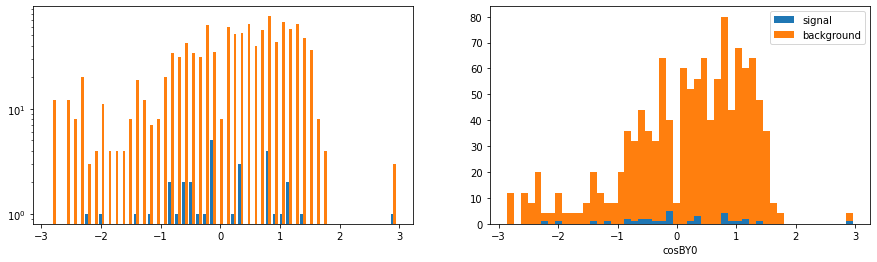

In [9]:
# cosBY0
cosBY0p_sig = pd.concat([
    aTree.query(cand0+AND+BpBmcut+AND+roecuts+AND+Bprec_eta+AND+f'( ((aBplusMode=={mode}) | (abs(aBminusMode)=={mode})) )')['cosBY0']
    for mode in [1019,1020,1039,1040]
])

cosBY0p_bkg = pd.concat([
    aTree.query(cand0+AND+BpBmcut+AND+roecuts+AND+Bprec_eta+AND+NOT+f'( ((aBplusMode=={mode}) | (abs(aBminusMode)=={mode})) )')['cosBY0']
    for mode in [1019,1020,1039,1040]
])


plt.figure(figsize=(15, 4))
ax_log = plt.subplot(121)
count, bins, _ = ax_log.hist([cosBY0p_sig,cosBY0p_bkg], label=['signal', 'background'], bins=50)
ax_log.set_yscale('log')
print(count[0])

# plt.figure(figsize=(15, 4))
ax_linear = plt.subplot(122)
count, bins, _ = ax_linear.hist([cosBY0p_sig,cosBY0p_bkg], label=['signal', 'background'], histtype='barstacked', bins=50)
plt.xlabel('cosBY0')

# plt.xlabel('cosBY0')
# count, bins, _ = plt.hist(cosBY0p_bkg, bins=10)
plt.legend()
# print(np.sort(count))
# print(bins)
# print(f'min value of signal for cosBY0p: {min(cosBY1p_sig)}, and max value for cosBY0p: {max(cosBY1p_sig)}')


In [ ]:
# cosBY1
cosBY1p_sig = pd.concat([
    aTree.query(cand0+AND+BpBmcut+AND+roecuts+AND+Bprec_eta+AND+'pi4_B1_isSignal==1'+AND+f'aBplusMode=={mode} | abs(aBminusMode)=={mode}')['cosBY1']
    for mode in [1019,1020,1039,1040]
])

cosBY1p_bkg = pd.concat([
    aTree.query(cand0+AND+BpBmcut+AND+roecuts+AND+Bprec_eta+AND+'pi4_B1_isSignal!=1'+AND+f'aBplusMode!={mode} | abs(aBminusMode)!={mode}')['cosBY1']
    for mode in [1019,1020,1039,1040]
])


(array([2., 1., 4., 8., 7., 4., 5., 0., 0., 1.]),
 array([-2.20420045, -1.68787396, -1.17154747, -0.65522098, -0.13889449,
         0.377432  ,  0.89375849,  1.41008498,  1.92641147,  2.44273796,
         2.95906445]),
 <BarContainer object of 10 artists>)

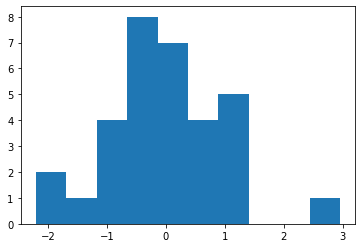

In [10]:
plt.hist(cosBY0p_sig)

#### The idea is to define a for loop to find the ratio of signal to background in different parts of the above histogram.

In [14]:
# sum function of list elements
l = [1, 2, 3, 4, 5]
def sum_of_list(l):
  total = 0
  for val in l:
    total = total + val
  return total
sum_of_list(count[0][:])

32.0

In [63]:
# the function of getting ratio in each window of histogram, and plot the significance
def get_x_ratio(width_list, bin_count):
    x_values_full, ratio_full, significance_full = ({} for n_d in range(3))
    
    for width in width_list:
        x_value, ratio, significance = ([] for n_l in range(3))
        
        for i in range(len(bin_count[0])):
            if i+width > len(bin_count[0]) :
                break
            else:
                n_sig = sum_of_list(bin_count[1][i:i+width]-bin_count[0][i:i+width])
                n_bkg = sum_of_list(bin_count[0][i:i+width])
                
                if n_bkg==0:
                    pass
                else:
                    x_value.append((i+(i+width))/2)
                    ratio.append(n_sig/n_bkg)
                    significance.append(n_sig/pow((n_sig+n_bkg), 0.5))

        x_values_full[width] = x_value
        ratio_full[width] = ratio
        significance_full[width] = significance
        show = plt.scatter(x_values_full[width], ratio_full[width], label=[f'{width}'])
        plt.xlabel('x_value')
        plt.ylabel('significance')
        
    return x_values_full, significance_full, ratio_full , show



# print(x_values_full)
# print(x_values_full[12])


# x_values_full, ratio_full = get_x_ratio([10,11,12])
# plt.plot(x_values_full[10], ratio_full[10])

# for key, value in x_values_full.items():
#     print(f"width is {key}, xvalues is {value}")

# x_values_full

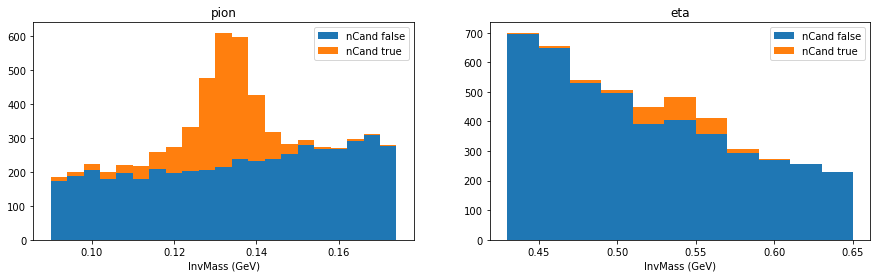

In [33]:
# pion
api0true_InvM=pd.concat([aTree.query(cand0+AND+pi0true0)["pi4_B0_InvM"],
                    aTree.query(cand0+AND+pi0true1)["pi4_B1_InvM"]])
api0false_InvM=pd.concat([aTree.query(cand0+AND+pi0wide0+AND+NOT+pi0true0)["pi4_B0_InvM"],
                     aTree.query(cand0+AND+pi0wide1+AND+NOT+pi0true1)["pi4_B1_InvM"]])

api0true_InvM_new=pd.concat([aTree.query(cand0+AND+BpBmcut+AND+y4scuts+AND+pi0true0)["pi4_B0_InvM"],
                    aTree.query(cand0+AND+BpBmcut+AND+y4scuts+AND+pi0true1)["pi4_B1_InvM"]])
api0false_InvM_new=pd.concat([aTree.query(cand0+AND+pi0wide0+AND+NOT+pi0true0)["pi4_B0_InvM"],
                     aTree.query(cand0+AND+pi0wide1+AND+NOT+pi0true1)["pi4_B1_InvM"]])

# eta
aetatrue_InvM=pd.concat([aTree.query(cand0+AND+etatrue0)["pi4_B0_InvM"],
                   aTree.query(cand0+AND+etatrue1)["pi4_B1_InvM"]])
aetafalse_InvM=pd.concat([aTree.query(cand0+AND+etawide0+AND+NOT+etatrue0)["pi4_B0_InvM"],
                   aTree.query(cand0+AND+etawide1+AND+NOT+etatrue1)["pi4_B1_InvM"]])

aetatrue_InvM_new=pd.concat([aTree.query(cand0+AND+etatrue0)["pi4_B0_InvM"],
                   aTree.query(cand0+AND+etatrue1)["pi4_B1_InvM"]])
aetafalse_InvM_new=pd.concat([aTree.query(cand0+AND+etawide0+AND+NOT+etatrue0)["pi4_B0_InvM"],
                   aTree.query(cand0+AND+etawide1+AND+NOT+etatrue1)["pi4_B1_InvM"]])


plt.figure(figsize=(15,4))
plt.subplot(121)
bin_values_pi0, edges_pi0, _ = plt.hist([api0false_InvM,api0true_InvM], bins=np.linspace(0.090, 0.174, 22), 
                                histtype="barstacked", label=["nCand false","nCand true"])
plt.xlabel('InvMass (GeV)')
plt.title('pion')
plt.legend()

plt.subplot(122)
bin_values_eta, edges, _ = plt.hist([aetafalse_InvM,aetatrue_InvM], bins=np.linspace(0.430, 0.650, 12), 
                                histtype="barstacked", label=["nCand false","nCand true"])
plt.xlabel('InvMass (GeV)')
plt.title('eta')
plt.legend()

#print(f"rms of true pi0  {np.std(api0true):.3f},    rms of true eta  {np.std(aetatrue):.3f}")

In [53]:
print('background: ', bin_values_pi0[0][0:2])
print('signal: ', bin_values_pi0[1][0:2])

print('sum background: ', sum_of_list(bin_values_pi0[0][0:2]))
print('sum signal: ', sum_of_list(bin_values_pi0[1][0:2]))
print(sum_of_list(bin_values_pi0[1][0:2]-bin_values_pi0[0][0:2]))

background:  [173. 188.]
signal:  [184. 199.]
sum background:  361.0
sum signal:  383.0
22.0


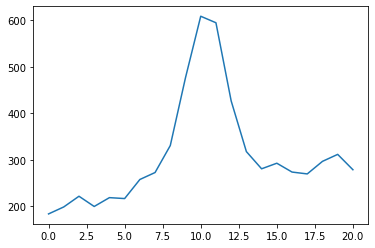

In [30]:
plt.plot(np.arange(21), bin_values_pi0[1])

21


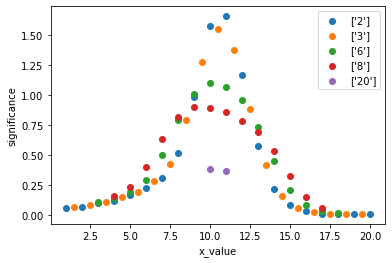

In [64]:
# testing get_x_ratio function
print(len(bin_values_pi0[0]))
window = [2, 3, 6, 8, 20]
x, s, r, p = get_x_ratio(window, bin_values_pi0)
plt.legend()

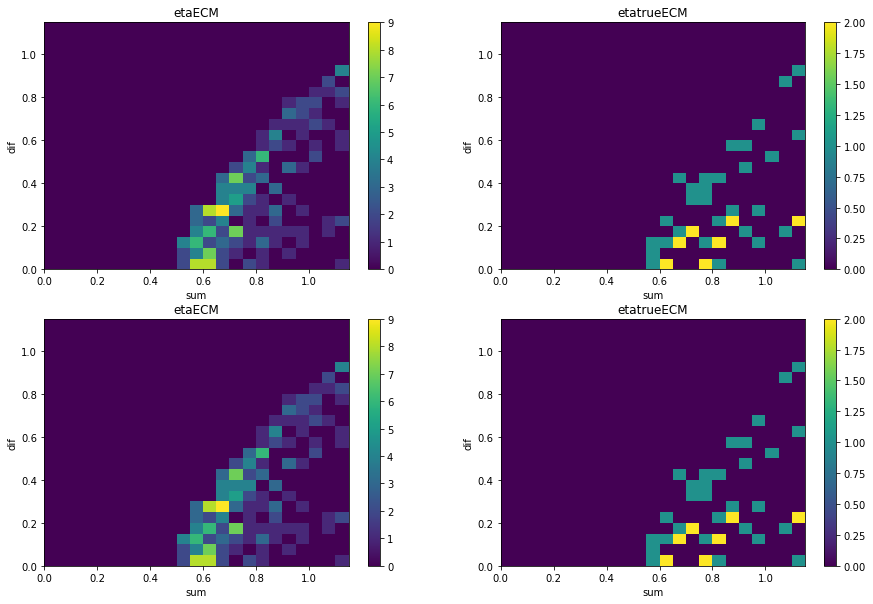

In [57]:
etaECMa=aTree.query(roecuts+AND+y4scuts+AND+etacut+AND+cand0)['pi4_0_B0_ECM']
etaECMb=aTree.query(roecuts+AND+y4scuts+AND+etacut+AND+cand0)['pi4_1_B0_ECM']
etaECMc=aTree.query(roecuts+AND+y4scuts+AND+etacut+AND+cand0)['pi4_0_B1_ECM']
etaECMd=aTree.query(roecuts+AND+y4scuts+AND+etacut+AND+cand0)['pi4_1_B1_ECM']
etaECM0=pd.concat([etaECMa,etaECMc])
etaECM1=pd.concat([etaECMb,etaECMd])
etatrueECMa=aTree.query(roecuts+AND+y4scuts+AND+etatrue+AND+cand0)['pi4_0_B0_ECM']
etatrueECMb=aTree.query(roecuts+AND+y4scuts+AND+etatrue+AND+cand0)['pi4_1_B0_ECM']
etatrueECMc=aTree.query(roecuts+AND+y4scuts+AND+etatrue+AND+cand0)['pi4_0_B1_ECM']
etatrueECMd=aTree.query(roecuts+AND+y4scuts+AND+etatrue+AND+cand0)['pi4_1_B1_ECM']
etatrueECM0=pd.concat([etatrueECMa,etatrueECMc])
etatrueECM1=pd.concat([etatrueECMb,etatrueECMd])
etaECMsum=etaECM0+etaECM1
etaECMdif=abs(etaECM0-etaECM1)
etatrueECMsum=etatrueECM0+etatrueECM1
etatrueECMdif=abs(etatrueECM0-etatrueECM1)

my_etaECMa=aTree.query(y4scuts+AND+etacut+AND+cand0)['pi4_0_B0_ECM']
my_etaECMb=aTree.query(y4scuts+AND+etacut+AND+cand0)['pi4_1_B0_ECM']
my_etaECMc=aTree.query(y4scuts+AND+etacut+AND+cand0)['pi4_0_B1_ECM']
my_etaECMd=aTree.query(y4scuts+AND+etacut+AND+cand0)['pi4_1_B1_ECM']
my_etaECM0=pd.concat([etaECMa,etaECMc])
my_etaECM1=pd.concat([etaECMb,etaECMd])
my_etatrueECMa=aTree.query(y4scuts+AND+etatrue+AND+cand0)['pi4_0_B0_ECM']
my_etatrueECMb=aTree.query(y4scuts+AND+etatrue+AND+cand0)['pi4_1_B0_ECM']
my_etatrueECMc=aTree.query(y4scuts+AND+etatrue+AND+cand0)['pi4_0_B1_ECM']
my_etatrueECMd=aTree.query(y4scuts+AND+etatrue+AND+cand0)['pi4_1_B1_ECM']
my_etatrueECM0=pd.concat([etatrueECMa,etatrueECMc])
my_etatrueECM1=pd.concat([etatrueECMb,etatrueECMd])
my_etaECMsum=etaECM0+etaECM1
my_etaECMdif=abs(etaECM0-etaECM1)
my_etatrueECMsum=etatrueECM0+etatrueECM1
my_etatrueECMdif=abs(etatrueECM0-etatrueECM1)

plt.figure(figsize=(15,10))
plt.subplot(221)
h_values, xedges, yedges, _ = plt.hist2d(etaECMsum, etaECMdif, list(np.arange(0,1.2,0.05)))
plt.xlabel('sum')
plt.ylabel('dif')
plt.colorbar()
plt.title('etaECM')
#plt.legend()

plt.subplot(222)
h_values, xedges, yedges, _ = plt.hist2d(etatrueECMsum, etatrueECMdif, list(np.arange(0,1.2,0.05)))
plt.xlabel('sum')
plt.ylabel('dif')
plt.title('etatrueECM')
plt.colorbar()
#plt.legend()

plt.subplot(223)
h_values, xedges, yedges, _ = plt.hist2d(my_etaECMsum, my_etaECMdif, list(np.arange(0,1.2,0.05)))
plt.xlabel('sum')
plt.ylabel('dif')
plt.colorbar()
plt.title('etaECM')

plt.subplot(224)
h_values, xedges, yedges, _ = plt.hist2d(my_etatrueECMsum, my_etatrueECMdif, list(np.arange(0,1.2,0.05)))
plt.xlabel('sum')
plt.ylabel('dif')
plt.title('etatrueECM')
plt.colorbar()

plt.show()

$ $
$ $

Try to see if there is discrimination in other variables; not so much.  In any case, we have to be careful about using kinematics to discriminate since the D(\*) eta lnu production model (phase space) is almost certainly very wrong.

In [58]:
etamodesBp = list((1019,1020,1039,1040,101019,101020,101039,101040,201019,201020,201039,201040))
etamodesBm = [-x for x in etamodesBp]
etamodesBpBm = etamodesBp + etamodesBm

etamodesB0 = list((1017,1018,1035,1036,101017,101018,101035,101036,201017,201018,201035,201036))
etamodesB0bar = [-x for x in etamodesB0]
etamodesB0B0 = etamodesB0 + etamodesB0bar

print(f'{-101019 in etamodesBpBm}  {1002 in etamodesB0B0}')
geneta=f'( (aBminusMode in {etamodesBpBm}) | (aBplusMode in {etamodesBpBm}) )'

True  False


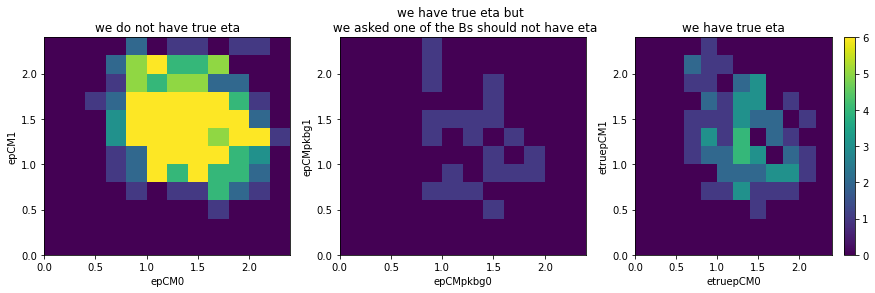

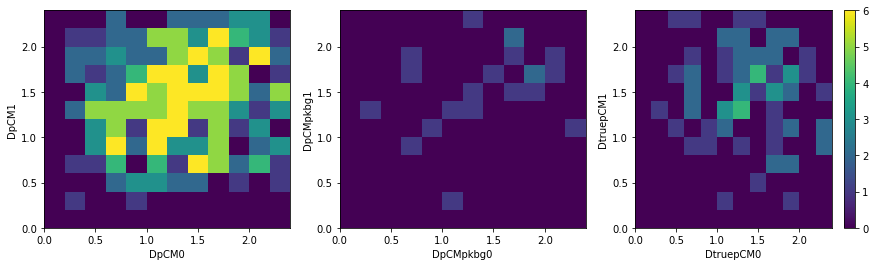

In [67]:
DpCM0=aTree.query(y4scuts+AND+etacut+AND+NOT+etatrue+AND+cand0)['D_B0_pCM']
DpCM1=aTree.query(y4scuts+AND+etacut+AND+NOT+etatrue+AND+cand0)['D_B1_pCM']
DpCMpkbg0=aTree.query(y4scuts+AND+etacut+AND+etatrue+AND+NOT+
                     f'( (aBminusMode in {etamodesBpBm}) | (aBplusMode in {etamodesBpBm}) | (aB0Mode in {etamodesB0B0}) | (aBbar0Mode in {etamodesB0B0}) )'+AND+
                     cand0)['D_B0_pCM']
DpCMpkbg1=aTree.query(y4scuts+AND+etacut+AND+etatrue+AND+NOT+
                     f'( (aBminusMode in {etamodesBpBm}) | (aBplusMode in {etamodesBpBm}) | (aB0Mode in {etamodesB0B0}) | (aBbar0Mode in {etamodesB0B0}) )'+AND+
                     cand0)['D_B1_pCM']
DtruepCM0=aTree.query(y4scuts+AND+etatrue+AND+cand0)['D_B0_pCM']
DtruepCM1=aTree.query(y4scuts+AND+etatrue+AND+cand0)['D_B1_pCM']

epCM0=aTree.query(y4scuts+AND+etacut+AND+NOT+etatrue+AND+cand0)['e_B0_pCM']
epCM1=aTree.query(y4scuts+AND+etacut+AND+NOT+etatrue+AND+cand0)['e_B1_pCM']
epCMpkbg0=aTree.query(y4scuts+AND+etacut+AND+etatrue+AND+NOT+
                     f'( (aBminusMode in {etamodesBpBm}) | (aBplusMode in {etamodesBpBm}) | (aB0Mode in {etamodesB0B0}) | (aBbar0Mode in {etamodesB0B0}) )'+AND+
                     cand0)['e_B0_pCM']
epCMpkbg1=aTree.query(y4scuts+AND+etacut+AND+etatrue+AND+NOT+
                     f'( (aBminusMode in {etamodesBpBm}) | (aBplusMode in {etamodesBpBm}) | (aB0Mode in {etamodesB0B0}) | (aBbar0Mode in {etamodesB0B0}) )'+AND+
                     cand0)['e_B1_pCM']
etruepCM0=aTree.query(y4scuts+AND+etatrue+AND+cand0)['e_B0_pCM']
etruepCM1=aTree.query(y4scuts+AND+etatrue+AND+cand0)['e_B1_pCM']


plt.figure(figsize=(15,4))
plt.subplot(131)
h_values, xedges, yedges, _ = plt.hist2d(epCM0, epCM1, list(np.arange(0,2.5,0.2)),
                                vmin=0,vmax=6, label=["p_e vs p_e, comb eta"])
plt.xlabel('epCM0')
plt.ylabel('epCM1')
plt.title('we do not have true eta')

plt.subplot(132)
h_values, xedges, yedges, _ = plt.hist2d(epCMpkbg0, epCMpkbg1, list(np.arange(0,2.5,0.2)),
                                vmin=0,vmax=6, label=["p_e vs p_e, pkg eta"])
plt.xlabel('epCMpkbg0')
plt.ylabel('epCMpkbg1')
plt.title('we have true eta but \n we asked one of the Bs should not have eta')

plt.subplot(133)
h_values, xedges, yedges, _ = plt.hist2d(etruepCM0, etruepCM1, list(np.arange(0,2.5,0.2)),
                                vmin=0,vmax=6, label=["p_e vs p_e, signal eta"])
plt.xlabel('etruepCM0')
plt.ylabel('etruepCM1')
plt.title('we have true eta')
plt.colorbar()

plt.figure(figsize=(15,4))
plt.subplot(131)
h_values, xedges, yedges, _ = plt.hist2d(DpCM0, DpCM1, list(np.arange(0,2.5,0.2)),
                                         vmin=0,vmax=6,label=["p_D0 vs p_D1 comb eta"])
plt.xlabel('DpCM0')
plt.ylabel('DpCM1')

plt.subplot(132)
h_values, xedges, yedges, _ = plt.hist2d(DpCMpkbg0, DpCMpkbg1, list(np.arange(0,2.5,0.2)),
                                         vmin=0,vmax=6,label=["p_D0 vs p_D1 pkg eta"])
plt.xlabel('DpCMpkbg0')
plt.ylabel('DpCMpkbg1')

plt.subplot(133)
h_values, xedges, yedges, _ = plt.hist2d(DtruepCM0, DtruepCM1, list(np.arange(0,2.5,0.2)),
                                         vmin=0,vmax=6,label=["p_D0 vs p_D1 signal eta"])
plt.xlabel('DtruepCM0')
plt.ylabel('DtruepCM1')
plt.colorbar()